In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def regression_score(xt, yt, model, label):
    table = pd.Series({'R2 score': round(r2_score(yt, model.predict(xt)), 3),
                      'RMSE': round(np.sqrt(mean_squared_error(yt, model.predict(xt))), 3),
                      'MAE':round(np.mean(abs(yt - model.predict(xt))), 3)},
                  name= label)
    return table

In [4]:
solar_df = pd.read_csv('D:\Study\Year 4 Sem 1\KIA 4001 FYP\solar power.csv')
solar_df.head()

,Date,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,1/9/2008,01:00,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,1/9/2008,04:00,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,1/9/2008,07:00,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,1/9/2008,10:00,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,1/9/2008,13:00,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [5]:
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2920 non-null   object 
 1   First Hour of Period                  2920 non-null   object 
 2   Is Daylight                           2920 non-null   bool   
 3   Distance to Solar Noon                2920 non-null   float64
 4   Average Temperature (Day)             2920 non-null   int64  
 5   Average Wind Direction (Day)          2920 non-null   int64  
 6   Average Wind Speed (Day)              2920 non-null   float64
 7   Sky Cover                             2920 non-null   int64  
 8   Visibility                            2920 non-null   float64
 9   Relative Humidity                     2920 non-null   int64  
 10  Average Wind Speed (Period)           2919 non-null   float64
 11  Average Barometri

In [6]:
solar_df.describe()

,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [7]:
solar_df['Date'] = pd.to_datetime(solar_df['Date'], format='%d/%m/%Y')
solar_df['First Hour of Period'] = pd.to_datetime(solar_df['First Hour of Period'], format='%H:%M').dt.time

In [8]:
solar_df.head()

,Date,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,2008-09-01,01:00:00,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,2008-09-01,04:00:00,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,2008-09-01,07:00:00,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,2008-09-01,10:00:00,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,2008-09-01,13:00:00,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [9]:
solar_df.isnull().sum(0).sort_values(ascending=False)

Average Wind Speed (Period)             1
Date                                    0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64

In [10]:
wind_mean = solar_df['Average Wind Speed (Period)'].mean()
solar_df['Average Wind Speed (Period)'].fillna(wind_mean, inplace=True)

In [11]:
solar_df.isnull().sum(0).sort_values(ascending=False)

Date                                    0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             0
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64

In [12]:
solar_df['Average Temperature (Day)'] = round((solar_df['Average Temperature (Day)']- 32)*(5/9), 2)
solar_df

,Date,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,2008-09-01,01:00:00,False,0.859897,20.56,28,7.5,0,10.0,75,8.0,29.82,0
1,2008-09-01,04:00:00,False,0.628535,20.56,28,7.5,0,10.0,77,5.0,29.85,0
2,2008-09-01,07:00:00,True,0.397172,20.56,28,7.5,0,10.0,70,0.0,29.89,5418
3,2008-09-01,10:00:00,True,0.165810,20.56,28,7.5,0,10.0,33,0.0,29.91,25477
4,2008-09-01,13:00:00,True,0.065553,20.56,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2009-08-31,10:00:00,True,0.166453,17.22,27,13.9,4,10.0,75,10.0,29.93,6995
2916,2009-08-31,13:00:00,True,0.064020,17.22,27,13.9,1,10.0,66,15.0,29.91,29490
2917,2009-08-31,16:00:00,True,0.294494,17.22,27,13.9,2,10.0,68,21.0,29.88,17257
2918,2009-08-31,19:00:00,True,0.524968,17.22,27,13.9,2,10.0,81,17.0,29.87,677


In [13]:
solar_df['Average Wind Direction (Day)'] = solar_df['Average Wind Direction (Day)'] * 10
solar_df.head()

,Date,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,2008-09-01,01:00:00,False,0.859897,20.56,280,7.5,0,10.0,75,8.0,29.82,0
1,2008-09-01,04:00:00,False,0.628535,20.56,280,7.5,0,10.0,77,5.0,29.85,0
2,2008-09-01,07:00:00,True,0.397172,20.56,280,7.5,0,10.0,70,0.0,29.89,5418
3,2008-09-01,10:00:00,True,0.165810,20.56,280,7.5,0,10.0,33,0.0,29.91,25477
4,2008-09-01,13:00:00,True,0.065553,20.56,280,7.5,0,10.0,21,3.0,29.89,30069


In [14]:
le = LabelEncoder()
solar_df['Is Daylight'] = le.fit_transform(solar_df['Is Daylight'])

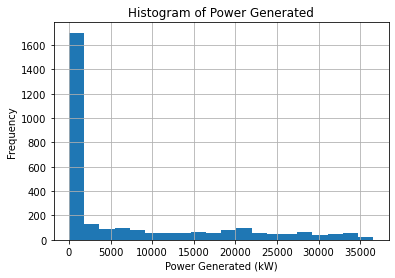

In [15]:
solar_df['Power Generated'].hist(bins=20)
plt.xlabel('Power Generated (kW)')
plt.ylabel('Frequency')
plt.title('Histogram of Power Generated')
plt.show()

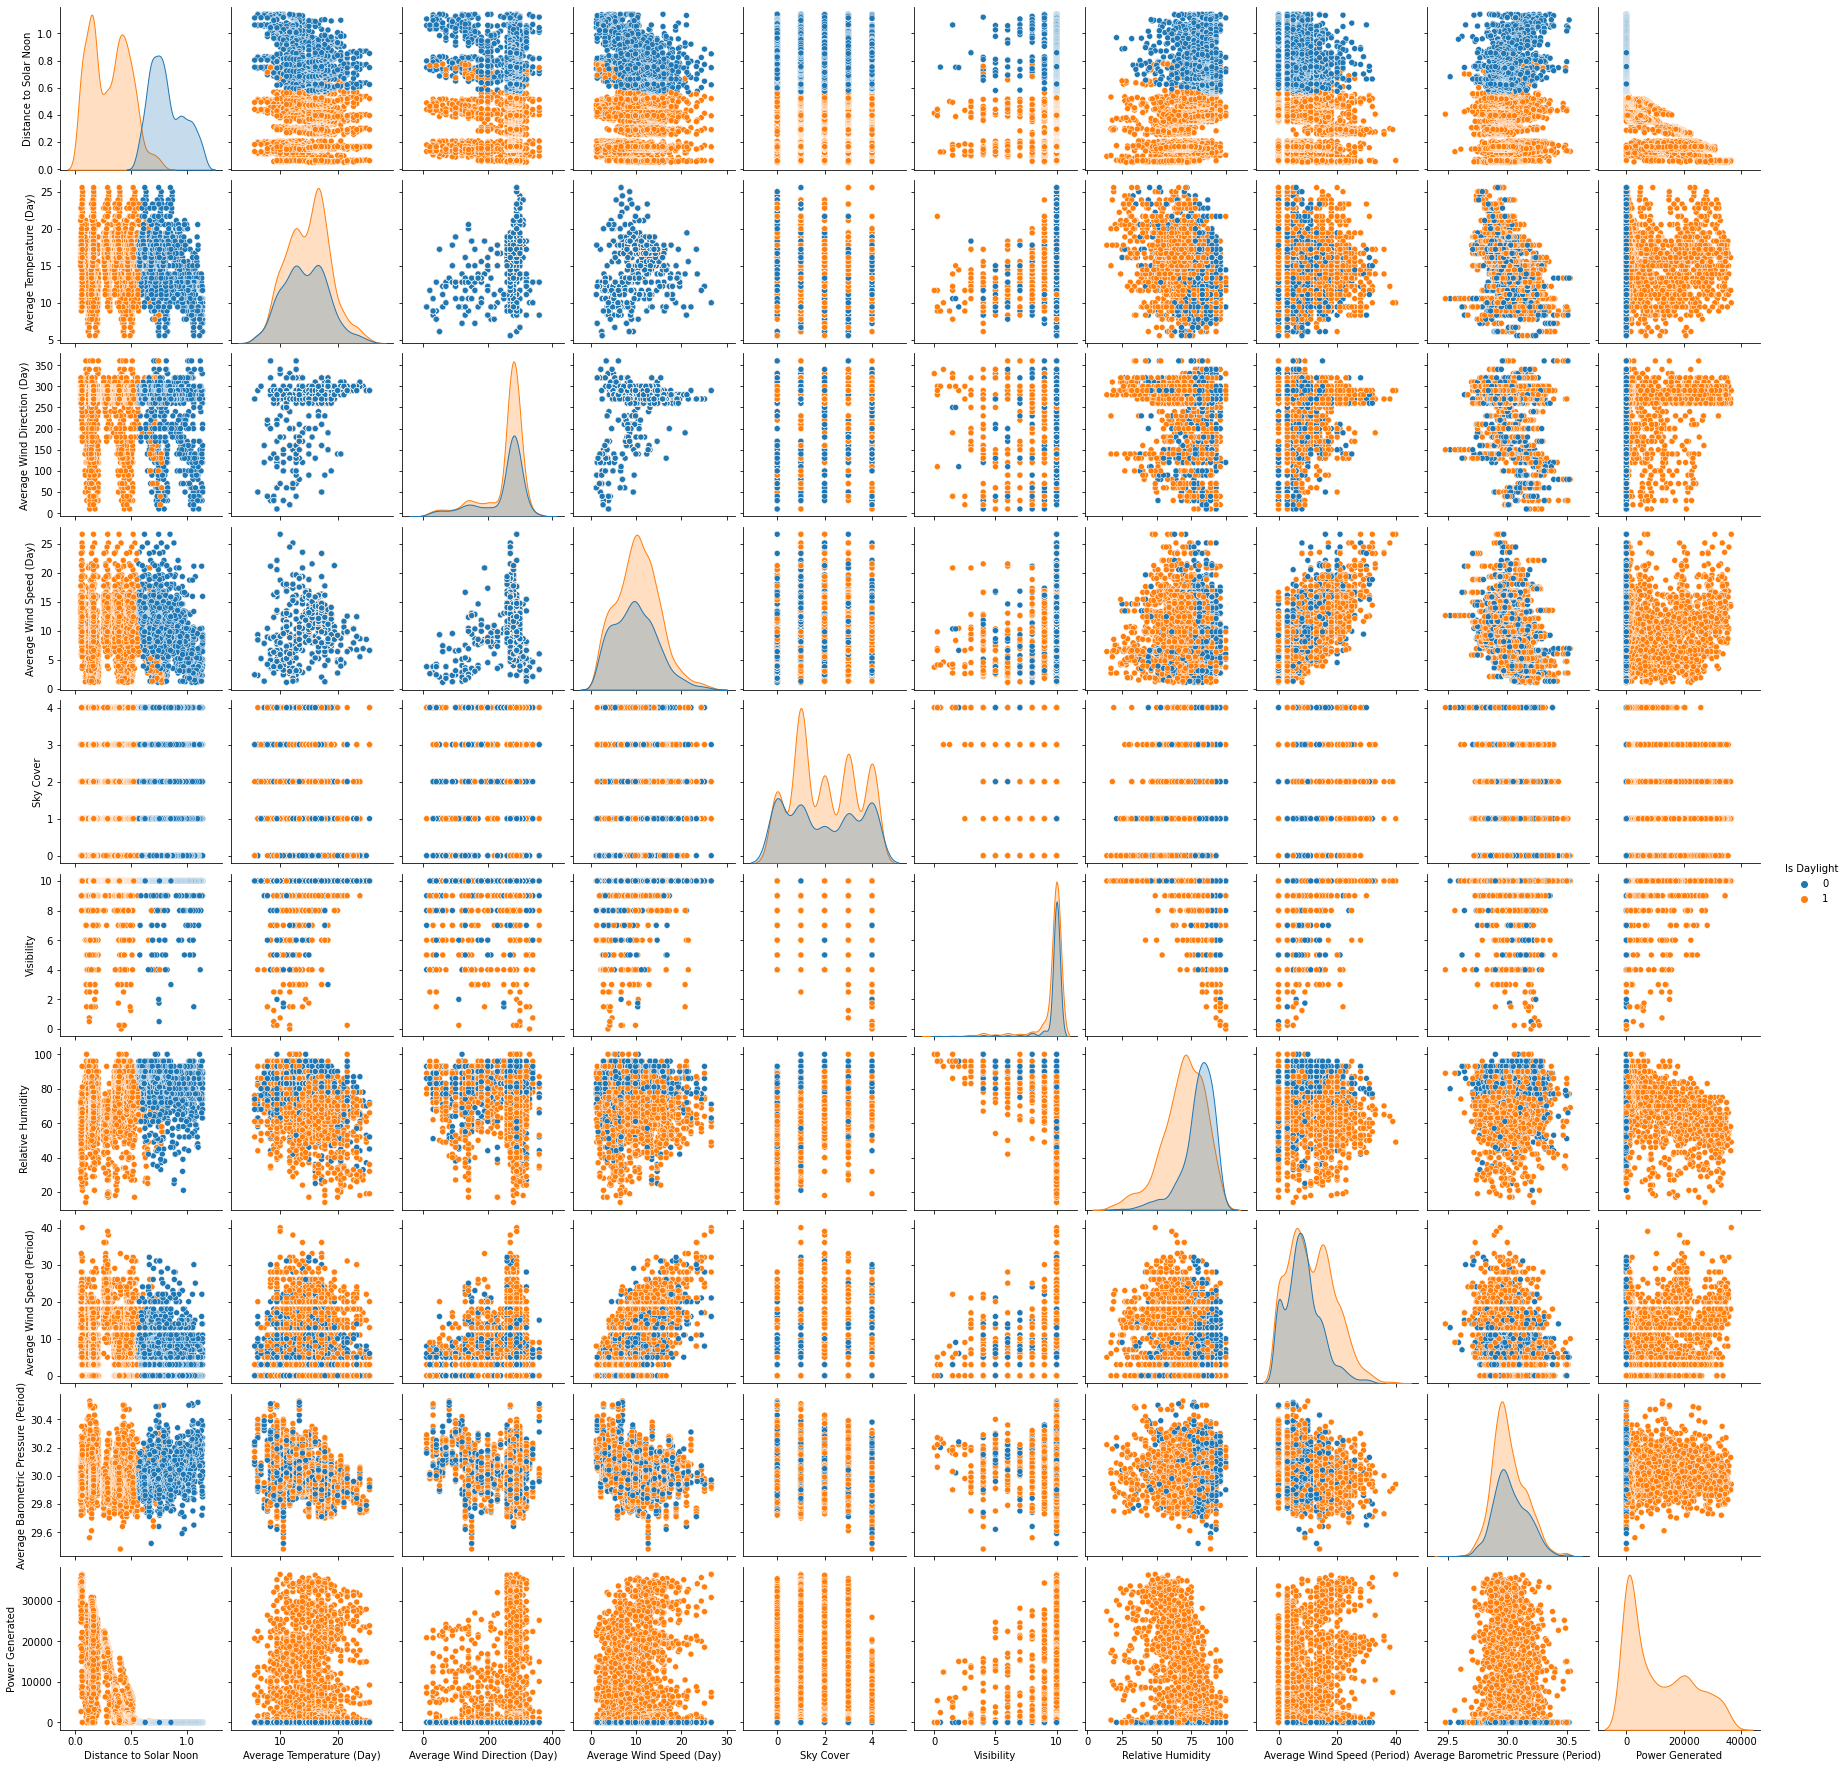

In [16]:
sns.pairplot(solar_df, hue='Is Daylight')

<AxesSubplot:title={'center':'Power Generated on Average Temperature'}, xlabel='Average Temperature (Day)', ylabel='Power Generated'>

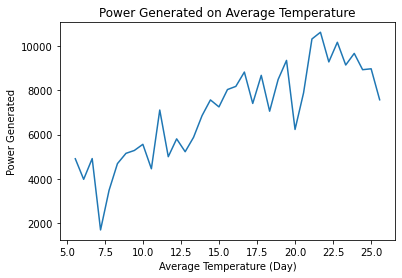

In [17]:
avg_temp = solar_df.groupby('Average Temperature (Day)')['Power Generated'].mean()
avg_temp.plot(title='Power Generated on Average Temperature', ylabel='Power Generated')

<AxesSubplot:title={'center':'Effect of Humidty on Power Generated'}, xlabel='Relative Humidity', ylabel='Power Generated'>

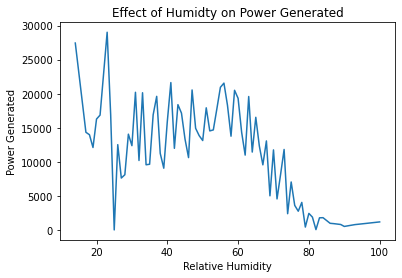

In [18]:
humidity = solar_df.groupby('Relative Humidity')['Power Generated'].mean()
humidity.plot(title='Effect of Humidty on Power Generated', ylabel='Power Generated')

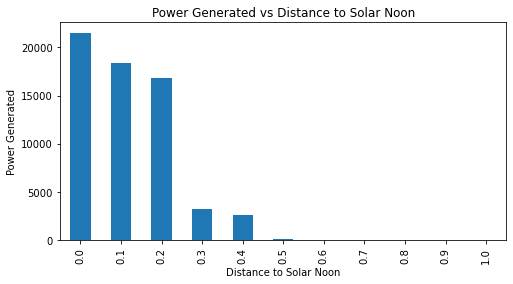

In [19]:
distance_noon = solar_df[['Distance to Solar Noon', 'Power Generated']]
distance_noon['Category'] = pd.cut(distance_noon['Distance to Solar Noon'], bins=11, 
                                   labels = [0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
distance_noon_cate = distance_noon.groupby('Category')['Power Generated'].mean()
plt.figure(figsize=(8,4))
distance_noon_cate.plot(kind='bar', title='Power Generated vs Distance to Solar Noon', ylabel='Power Generated', xlabel='Distance to Solar Noon')
plt.show()

In [20]:
daylight = solar_df.groupby('Is Daylight')['Power Generated'].mean()
daylight

Is Daylight
0        0.000000
1    11291.496399
Name: Power Generated, dtype: float64

In [21]:
solar_corr = solar_df.corr()
solar_corr

,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
Is Daylight,1.000000,-0.827072,0.067232,0.056284,0.059940,0.028587,-0.087069,-0.340942,0.192269,-0.053754,0.532062
Distance to Solar Noon,-0.827072,1.000000,-0.145208,-0.118010,-0.145073,-0.015184,0.065807,0.368964,-0.214887,0.082505,-0.746681
Average Temperature (Day),0.067232,-0.145208,1.000000,0.342149,0.096201,-0.230649,0.194102,-0.221437,0.054503,-0.435738,0.132197
Average Wind Direction (Day),0.056284,-0.118010,0.342149,1.000000,0.341529,-0.137140,0.203445,-0.095917,0.229706,-0.272405,0.146788
Average Wind Speed (Day),0.059940,-0.145073,0.096201,0.341529,1.000000,0.107793,0.184778,0.004901,0.673364,-0.379752,0.142641
Sky Cover,0.028587,-0.015184,-0.230649,-0.137140,0.107793,1.000000,-0.223523,0.394576,0.044301,-0.091512,-0.187236
Visibility,-0.087069,0.065807,0.194102,0.203445,0.184778,-0.223523,1.000000,-0.291320,0.143224,-0.105345,0.076536
Relative Humidity,-0.340942,0.368964,-0.221437,-0.095917,0.004901,0.394576,-0.291320,1.000000,-0.217959,0.018489,-0.522545
Average Wind Speed (Period),0.192269,-0.214887,0.054503,0.229706,0.673364,0.044301,0.143224,-0.217959,1.000000,-0.293406,0.278154
Average Barometric Pressure (Period),-0.053754,0.082505,-0.435738,-0.272405,-0.379752,-0.091512,-0.105345,0.018489,-0.293406,1.000000,-0.036771


In [22]:
triu_index = np.triu_indices_from(solar_corr)
for row, column in zip(*triu_index):
    solar_corr.iloc[row, column] = np.NaN

Text(0.5, 1.0, 'Correlation for each features')

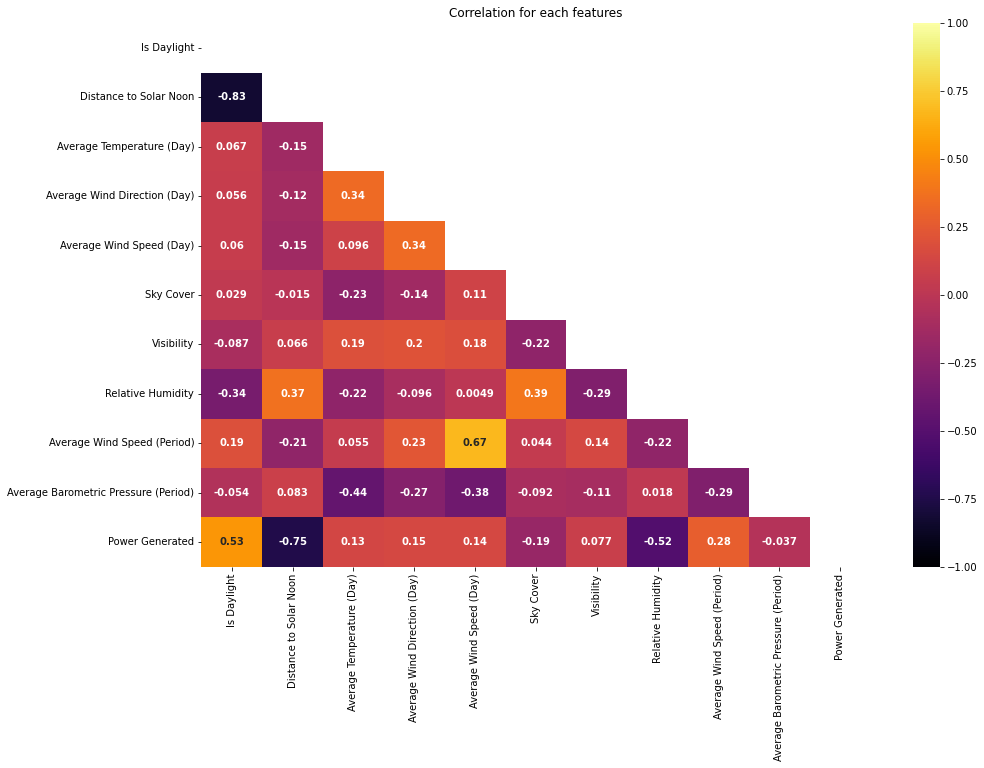

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(solar_corr, annot=True, annot_kws={'weight':'bold'}, cmap='inferno', vmin=-1, vmax=1)
plt.title('Correlation for each features')

In [24]:
features = list(solar_df)
features.remove('Date')
features.remove('First Hour of Period')
features

['Is Daylight',
 'Distance to Solar Noon',
 'Average Temperature (Day)',
 'Average Wind Direction (Day)',
 'Average Wind Speed (Day)',
 'Sky Cover',
 'Visibility',
 'Relative Humidity',
 'Average Wind Speed (Period)',
 'Average Barometric Pressure (Period)',
 'Power Generated']

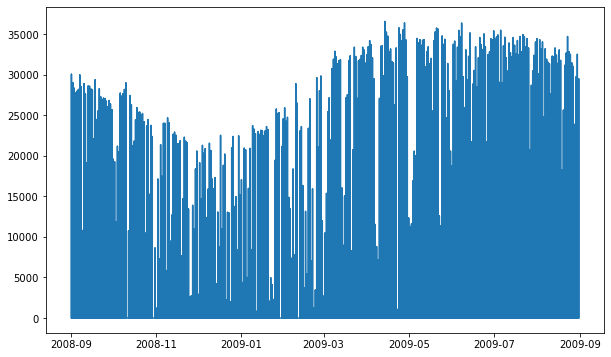

In [25]:
plt.figure(figsize=(10,6))
plt.plot(solar_df['Date'], solar_df['Power Generated'])

In [26]:
X = solar_df[features].drop(columns='Power Generated')
y = solar_df['Power Generated']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# 1 . Linear Regression

In [28]:
pipe_lr = Pipeline(steps=[('pr', PolynomialFeatures(degree=2, include_bias=False)),
                           ('ss', StandardScaler()),
                           ('lr', LinearRegression())])
params_lr = {'pr__degree':[2,3,4,5],
            'pr__include_bias': [True, False]}
cv_lr = GridSearchCV(pipe_lr, params_lr, cv=4)
cv_lr.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pr',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('lr', LinearRegression())]),
             param_grid={'pr__degree': [2, 3, 4, 5],
                         'pr__include_bias': [True, False]})

In [29]:
linear_score = regression_score(X_test, y_test, cv_lr, 'Linear Regression')
linear_score

R2 score       0.847
RMSE        4015.220
MAE         2298.363
Name: Linear Regression, dtype: float64

# 2. Support Vector Regressor

In [30]:
pipe_svr = Pipeline(steps=[('pr',PolynomialFeatures(degree=2)),
                           ('ss', StandardScaler()),
                          ('svr', SVR(kernel='linear', degree=2))])
params_svr = {'pr__degree':[2,3,4],
             'svr__kernel':['linear','rbf','poly'],
             'svr__degree':[2,3,4,5]}
cv_svr = GridSearchCV(pipe_svr, params_svr, cv=4)
cv_svr.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pr', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('svr',
                                        SVR(degree=2, kernel='linear'))]),
             param_grid={'pr__degree': [2, 3, 4], 'svr__degree': [2, 3, 4, 5],
                         'svr__kernel': ['linear', 'rbf', 'poly']})

In [31]:
cv_svr.best_params_

{'pr__degree': 4, 'svr__degree': 2, 'svr__kernel': 'linear'}

In [32]:
svr_score = regression_score(X_test, y_test, cv_svr, 'Support Vector Regressor')
svr_score

R2 score       0.816
RMSE        4400.032
MAE         2668.001
Name: Support Vector Regressor, dtype: float64

# 3. KNeighbors Regressor

In [33]:
pipe_knr =  Pipeline(steps=[('pr', PolynomialFeatures(degree=2)),
                           ('ss', StandardScaler()),
                           ('knr', KNeighborsRegressor(n_neighbors=2, weights='uniform'))])
params_knr = {'pr__degree':[2,3,4,5],
             'knr__n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
             'knr__weights':['uniform','distance']}
cv_knr = GridSearchCV(pipe_knr, params_knr, cv=4)
cv_knr.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pr', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('knr',
                                        KNeighborsRegressor(n_neighbors=2))]),
             param_grid={'knr__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20],
                         'knr__weights': ['uniform', 'distance'],
                         'pr__degree': [2, 3, 4, 5]})

In [34]:
cv_knr.best_estimator_

Pipeline(steps=[('pr', PolynomialFeatures(degree=5)), ('ss', StandardScaler()),
                ('knr',
                 KNeighborsRegressor(n_neighbors=11, weights='distance'))])

In [35]:
knr_score = regression_score(X_test, y_test, cv_knr, 'KNeighbors Regressor')
knr_score

R2 score       0.856
RMSE        3893.412
MAE         2044.525
Name: KNeighbors Regressor, dtype: float64

# 4. Random Forest

In [36]:
rf = RandomForestRegressor(n_jobs=-1)
params_rf = {'bootstrap': [True, False],
            'max_depth': [2*n+1 for n in range(10)],
            'n_estimators': [2*n+1 for n in range(20)],
            'max_features':['auto','sqrt','log2']}
cv_rf = GridSearchCV(rf, params_rf, cv=4)
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]})

In [37]:
cv_rf.best_params_

{'bootstrap': False,
 'max_depth': 17,
 'max_features': 'sqrt',
 'n_estimators': 37}

In [38]:
rf_score = regression_score(X_test, y_test, cv_rf, 'Random Forest Regressor')
rf_score

R2 score       0.902
RMSE        3205.964
MAE         1604.601
Name: Random Forest Regressor, dtype: float64

# 5. Gradient Boosting Regressor

In [39]:
gbr = GradientBoostingRegressor()
params_gbr = {'n_estimators': [2*n+1 for n in range(30)],
             'learning_rate': [0.1*n+1 for n in range(10)],
              'criterion': ['friedman_mse','squared_error']}
cv_gbr = GridSearchCV(gbr, params_gbr, cv=4)
cv_gbr.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
                                           1.7000000000000002, 1.8, 1.9],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39,
                                          41, 43, 45, 47, 49, 51, 53, 55, 57,
                                          59]})

In [40]:
cv_gbr.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 1.0, 'n_estimators': 3}

In [41]:
gbr_score = regression_score(X_test, y_test, cv_gbr, 'Gradient Boosting Regressor')
gbr_score

R2 score       0.866
RMSE        3762.496
MAE         2011.019
Name: Gradient Boosting Regressor, dtype: float64

# 6. Stacking Regressor

In [42]:
sr_steps = StackingRegressor(estimators = [('dt', DecisionTreeRegressor()), 
                                     ('svr', SVR()), 
                                     ('knr', KNeighborsRegressor())],
                      final_estimator = RidgeCV(), n_jobs=-1)

pipe_sr = Pipeline(steps=[('pr', PolynomialFeatures()),
                          ('ss', StandardScaler()),
                          ('sr', sr_steps)])

params_sr = {'pr__degree': [1,2,3,4],
            'sr__dt__max_depth': [2*n+1 for n in range(10)],
            'sr__svr__C': [0.01, 0.1, 1],
            'sr__svr__kernel': ['poly','linear','rbf'],
            'sr__svr__degree':[1,2,3,4],
            'sr__knr__n_neighbors': [n for n in range(10)]}

cv_sr = GridSearchCV(pipe_sr, params_sr, cv=4)
cv_sr.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
cv_sr.best_params_

In [ ]:
sr_score = regression_score(X_test, y_test, cv_sr, 'Stacking Regressor')
sr_score

# Overall Score

In [ ]:
df_score = pd.concat([linear_score, knr_score, svr_score, rf_score, gbr_score], axis=1).T
df_score